In [1]:
from IPython.display import Image

## BLEU


- Bilingual Evaluation Understudy

```
reference: I am thirty six years old
generation: I have thirsty six years

```

- reference vs. generation
    - unigram precision = num word matches / num words in generation
        - = 4/5
    - 但如果 generation 的重复度很高
        - generation：six six six six six
        - unigram precision = 5/5
        - modified unigram precision = clip(num word matches) / num words in generation
            - 1/5
            - 如果此时顺序是颠倒的，generation：years six thirty have I
                - 4/5 

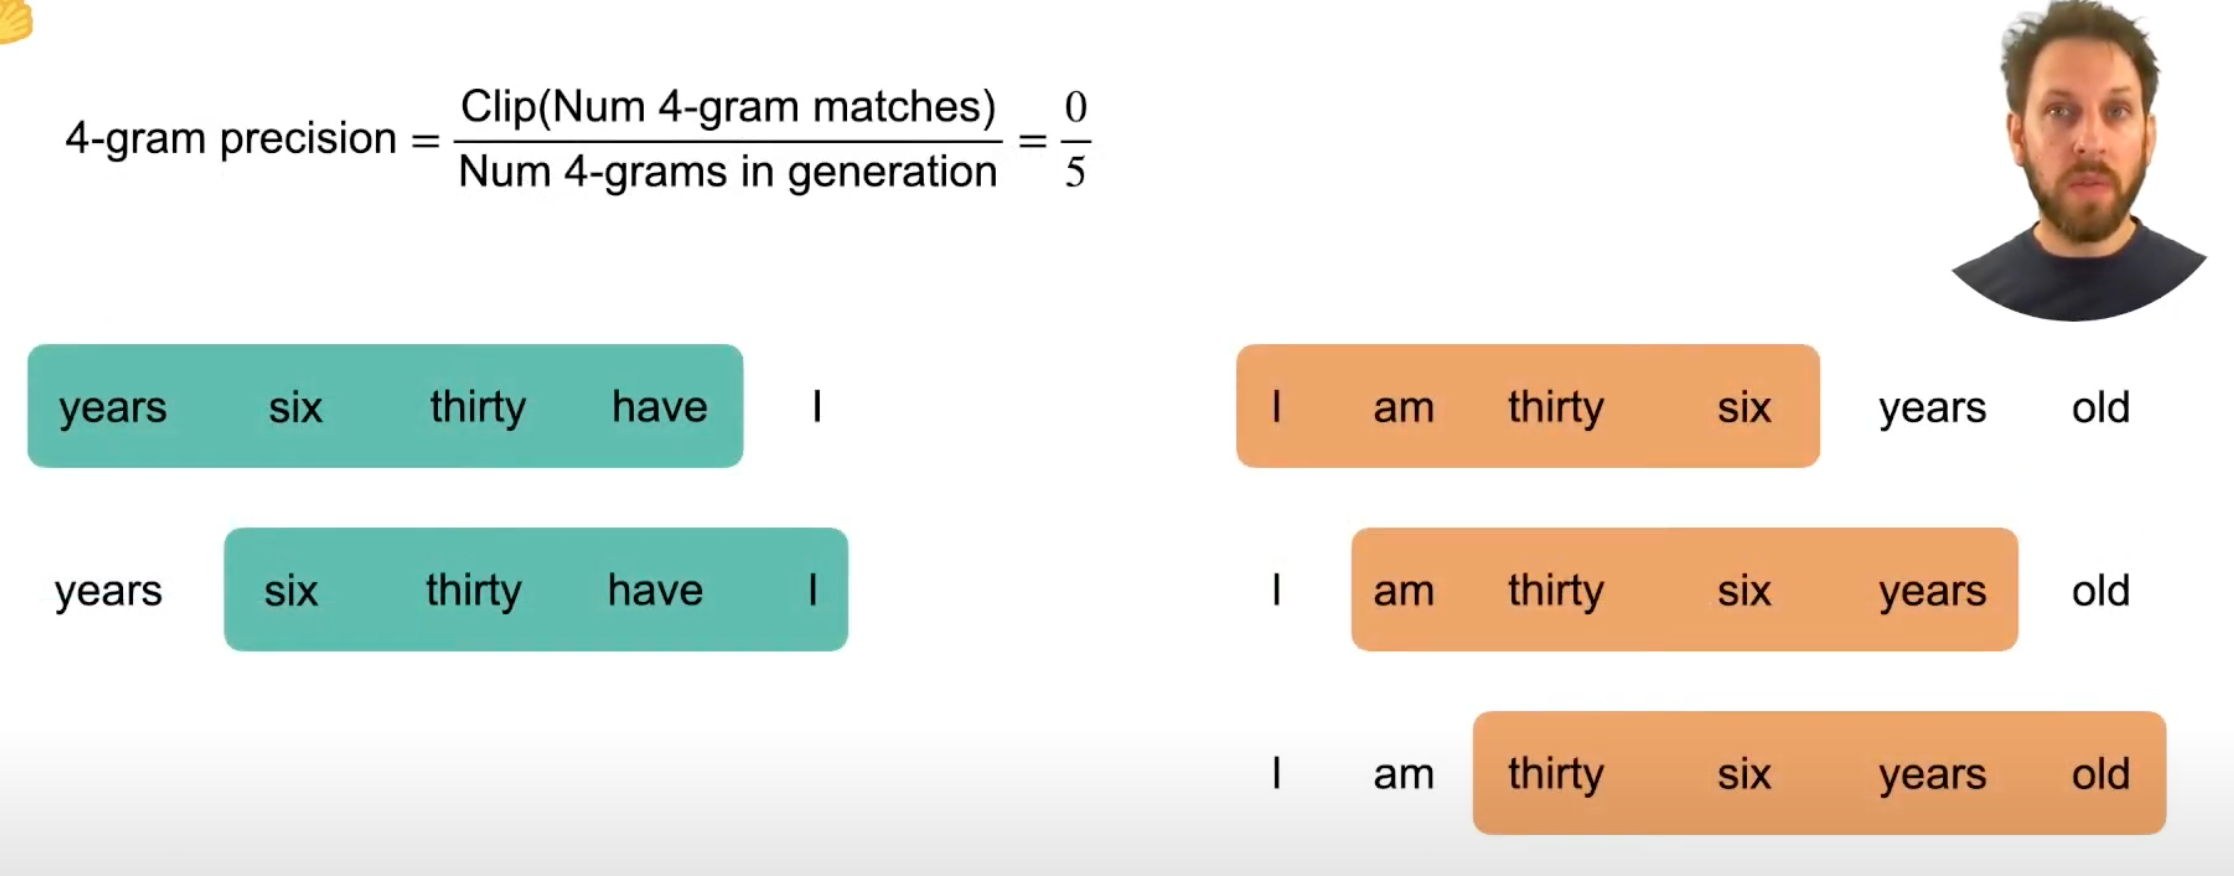

In [4]:
Image('../imgs/4-gram.png', width=600)

In [8]:
import os
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7890'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7890'

In [17]:
# !pip install evaluate rouge-score

In [26]:
# import evaluate
# bleu = evaluate.load('bleu')
from datasets import load_metric
bleu = load_metric('bleu')

In [27]:
# 同一个 prediction 可以有多个 preference，
# 但 predictions 的长度必须与 references 的长度保持一致
predictions = [['I', 'have', 'thirty', 'six', 'years']]
references = [
    [['I', 'am', 'thirty', 'six', 'years', 'old'], ['I', 'am', 'thirty', 'six']]
]
bleu.compute(predictions=predictions, references=references)

{'bleu': 0.0,
 'precisions': [0.8, 0.5, 0.3333333333333333, 0.0],
 'brevity_penalty': 1.0,
 'length_ratio': 1.25,
 'translation_length': 5,
 'reference_length': 4}

- precisions：分别表示 unigram，bigram，trigram，4-gram precision scores
- bleu-4

$$
\sqrt[4]{p_1\cdot p_2\cdot p_3 \cdot p_4}
$$

### bleu => sacrebleu

- use internal tokenizer

In [28]:
!pip install sacrebleu

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 1.8 MB/s eta 0:00:00a 0:00:01


In [30]:

sacrebleu = load_metric('sacrebleu')
predictions = ['I have thirty six years']
references = [['I am thirty six years old', 'I am thirty six']]
sacrebleu.compute(predictions=predictions, references=references)

{'score': 42.72870063962342,
 'counts': [4, 2, 1, 0],
 'totals': [5, 4, 3, 2],
 'precisions': [80.0, 50.0, 33.333333333333336, 25.0],
 'bp': 1.0,
 'sys_len': 5,
 'ref_len': 4}